# Introduction #

В предыдущем уроке мы рассмотрели наш первый основанный на моделях метод проектирования объектов: кластеризацию. В этом уроке мы рассмотрим наш следующий: анализ основных компонентов (PCA). Точно так же, как кластеризация - это разделение набора данных на основе близости, PCA можно рассматривать как разделение различий в данных. PCA - отличный инструмент, который поможет вам обнаружить важные взаимосвязи в данных, а также может быть использован для создания более информативных функций.

(Техническое примечание: PCA обычно применяется к [standardized](https://www.kaggle.com/alexisbcook/scaling-and-normalization) данные. При использовании стандартизированных данных "вариация" означает "корреляция". При использовании стандартизированных данных "вариация" означает "ковариация". Все данные в этом курсе будут стандартизированы перед применением PCA.)

# Principal Component Analysis #
В [*Abalone*](https://www.kaggle.com/rodolfomendes/abalone-dataset) набор данных - это физические измерения, сделанные на нескольких тысячах тасманских морских ушках. (Морское ушко - это морское существо, очень похожее на моллюска или устрицу.) Пока мы рассмотрим только пару особенностей: `'Height'` and `'Diameter'` из их раковин.

Вы можете себе представить, что в этих данных есть "оси вариаций", которые описывают, как морские ушки отличаются друг от друга. На рисунке эти оси представлены в виде перпендикулярных линий, проходящих вдоль естественных размеров данных, по одной оси для каждого исходного объекта.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/rr8NCDy.png" width=300, alt="">
<figcaption style="textalign: center; font-style: italic"><center>
</center></figcaption>
</figure>

Часто мы даем названия этим осям вариаций. Более длинную ось мы могли бы назвать компонентом "Размер": малая высота и малый диаметр (внизу слева) контрастируют с большой высотой и большим диаметром (вверху справа). Более короткую ось мы могли бы назвать компонентом "Формы": малая высота и большой диаметр (плоская форма) контрастируют с большой высотой и малым диаметром (круглая форма).

Обратите внимание, что вместо описания морских ушек по их `'Height'` и `'Diameter'`,с таким же успехом мы могли бы описать их по их `'Size'` и `'Shape'`. В этом, собственно, и заключается вся идея PCA: вместо описания данных с помощью исходных признаков, мы описываем их с помощью осей вариации. Оси вариации становятся новыми признаками.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/XQlRD1q.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center>Основные компоненты становятся новыми объектами при вращении набора данных в пространстве объектов.
</center></figcaption>
</figure>

Новые функции, построенные PCA, на самом деле являются просто линейными комбинациями (взвешенными суммами) исходных функций:

```
df["Size"] = 0.707 * X["Height"] + 0.707 * X["Diameter"]
df["Shape"] = 0.707 * X["Height"] - 0.707 * X["Diameter"]
```

Эти новые функции называются **principal components** из данных. Сами веса называются **loadings**. Основных компонентов будет столько, сколько объектов в исходном наборе данных: если бы мы использовали десять объектов вместо двух, то в итоге получили бы десять компонентов.

Нагрузки на компоненты говорят нам о том, какие вариации они выражают с помощью знаков и величин:

| Features \ Components | Size (PC1) | Shape (PC2) |
|-----------------------|------------|-------------|
| Height                | 0.707      | 0.707       |
| Diameter              | 0.707      | -0.707      |

Эта таблица нагрузок говорит нам о том, что в `Size` компонент, `Height` и `Diameter` изменяются в одном и том же направлении (с одним и тем же знаком), но в `Shape` cкомпоненты изменяются в противоположных направлениях (противоположный знак). В каждом компоненте нагрузки одинаковы по величине, и, следовательно, характеристики влияют одинаково на оба компонента.

PCA также сообщает нам о *amount* различий в каждом компоненте. Из рисунков видно, что данные отличаются друг от друга еще больше. `Size` компонента, чем вдоль `Shape` компонент. PCA обеспечивает это с точностью благодаря каждому компоненту **percent of explained variance**.

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/xWTvqDA.png" width=600, alt="">
<figcaption style="textalign: center; font-style: italic"><center> На размер приходится около 96%, а на форму - около 4% разницы между высотой и диаметром.
</center></figcaption>
</figure>

The `Size` компонент отражает большую часть различий между `Height` и `Diameter`. Однако важно помнить, что величина дисперсии в компоненте не обязательно соответствует тому, насколько он хорош в качестве предиктора: это зависит от того, что вы пытаетесь предсказать.

# PCA for Feature Engineering #

Есть два способа, которыми вы могли бы использовать PCA для разработки функций.

Первый способ - использовать его в качестве описательного метода. Поскольку компоненты сообщают вам о вариациях, вы можете рассчитать баллы MI для компонентов и посмотреть, какие вариации наиболее точно соответствуют вашей цели. Это могло бы подсказать вам идеи о том, какие функции можно создать - продукт из `'Height'` и `'Diameter'` если `'Size'` важен, скажем, или соотношение `'Height'` и `'Diameter'` если `Shape` это важно. Вы даже можете попробовать выполнить кластеризацию по одному или нескольким компонентам, получившим высокую оценку.

Второй способ - использовать сами компоненты в качестве функций. Поскольку компоненты напрямую отображают вариационную структуру данных, они часто могут быть более информативными, чем исходные функции. Вот несколько вариантов использования:
- **Dimensionality reduction**: Когда ваши функции сильно избыточны (*multicollinear*, конкретно), PCA разделит избыточность на один или несколько компонентов с почти нулевой дисперсией, которые затем можно отбросить, поскольку они будут содержать мало информации или вообще не будут содержать ее.
- **Anomaly detection**: Необычные отклонения, которые не видны по исходным характеристикам, часто обнаруживаются в компонентах с низкой дисперсией. Эти компоненты могут быть очень информативными при обнаружении аномалий или выбросов.
- **Noise reduction**: В совокупности показаний датчиков часто присутствует некоторый общий фоновый шум. Иногда PCA может разделить (информативный) сигнал на меньшее количество элементов, оставляя шум в покое, тем самым повышая соотношение сигнал/шум.
- **Decorrelation**: Некоторые алгоритмы ML сталкиваются с трудностями при работе с сильно коррелированными объектами. PCA преобразует коррелированные объекты в некоррелированные компоненты, что может упростить работу вашего алгоритма.

PCA, по сути, предоставляет вам прямой доступ к корреляционной структуре ваших данных. Вы, без сомнения, придумаете свои собственные приложения!

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
<strong>PCA Best Practices</strong><br>
Есть несколько вещей, которые следует иметь в виду при применении PCA:
<ul>
<li> PCA работает только с числовыми функциями, такими как непрерывные величины или подсчеты.
<li> PCA чувствителен к масштабированию. Рекомендуется стандартизировать данные перед применением PCA, если только у вас нет веских причин этого не делать.
<li> Подумайте об удалении или ограничении выбросов, поскольку они могут оказать чрезмерное влияние на результаты.
</ul>
</blockquote>

# Example - 1985 Automobiles #

В этом примере мы вернемся к нашему [*Automobile*](https://www.kaggle.com/toramky/automobile-dataset) создайте набор данных и примените PCA, используя его как описательный метод для обнаружения функций. В этом упражнении мы рассмотрим другие варианты использования.

Эта скрытая ячейка загружает данные и определяет функции `plot_variance` и `make_mi_scores`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression


plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


df = pd.read_csv("autos.csv")

Мы выбрали четыре функции, которые охватывают целый ряд свойств. Каждая из этих функций также имеет высокий рейтинг MI у целевой аудитории., `price`. Мы стандартизируем данные, поскольку эти функции, естественно, не находятся в одинаковом масштабе.

In [3]:
features = ["highway_mpg", "engine_size", "horsepower", "curb_weight"]

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

Теперь мы можем использовать scikit-learn `PCA` выполните оценку и создайте основные компоненты. Здесь вы можете увидеть первые несколько строк преобразованного набора данных.

In [4]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4
0,0.382486,-0.400222,0.124122,0.169539
1,0.382486,-0.400222,0.124122,0.169539
2,1.550890,-0.107175,0.598361,-0.256081
3,-0.408859,-0.425947,0.243335,0.013920
4,1.132749,-0.814565,-0.202885,0.224138


После примерки, `PCA` экземпляр содержит загрузки в своем `components_`атрибут. (К сожалению, терминология для PCA противоречива. Мы следуем соглашению, которое вызывает преобразованные столбцы в `X_pca` the *components*, которые в противном случае не имеют названия.) Мы заключим загрузку во фрейм данных.

In [5]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # таким образом, столбцы являются основными компонентами
    index=X.columns,  # а строки - это оригинальные элементы
)
loadings

,PC1,PC2,PC3,PC4
highway_mpg,-0.492347,0.770892,0.070142,-0.397996
engine_size,0.503859,0.626709,0.019960,0.594107
horsepower,0.500448,0.013788,0.731093,-0.463534
curb_weight,0.503262,0.113008,-0.678369,-0.523232


Напомним, что знаки и величины нагрузок на компоненты говорят нам о том, какие изменения они фиксируют. Первый компонент (`PC1`) демонстрирует контраст между большими, мощными автомобилями с низким расходом бензина и небольшими, более экономичными автомобилями с хорошим расходом бензина. Мы могли бы назвать это осью "Роскошь/экономичность". На следующем рисунке показано, что четыре выбранных нами параметра в основном различаются по оси "Роскошь/экономичность".

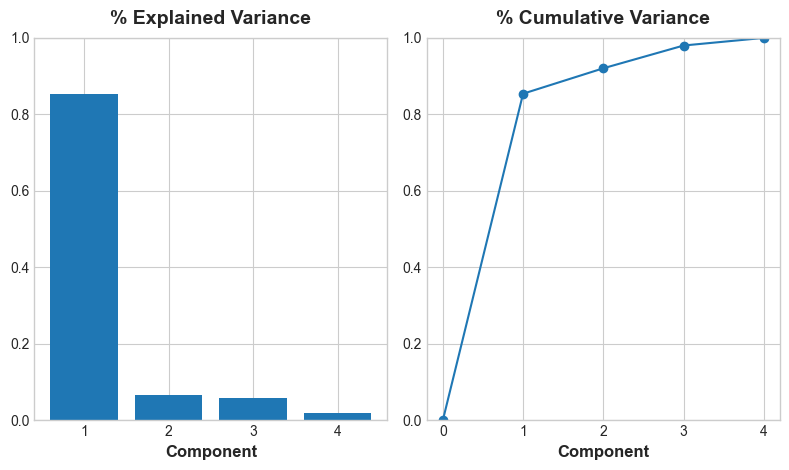

In [6]:
# Посмотрите на объясненную разницу
plot_variance(pca);

Давайте также посмотрим на показатели MI для компонентов. Неудивительно, что `PC1` является высокоинформативным, хотя остальные компоненты, несмотря на их небольшую разницу, по-прежнему имеют значительную взаимосвязь с `ценой`. Возможно, стоит изучить эти компоненты, чтобы найти взаимосвязи, не охватываемые основной осью "Роскошь/экономичность".

In [7]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.013706
PC2    0.379520
PC3    0.306841
PC4    0.204073
Name: MI Scores, dtype: float64

Третий компонент демонстрирует контраст между `horsepower` и `curb_weight` -- похоже, спортивные автомобили против универсалов.

In [8]:
# Show dataframe sorted by PC3
idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body_style", "horsepower", "curb_weight"]
df.loc[idx, cols]

,make,body_style,horsepower,curb_weight
118,porsche,hardtop,207,2756
117,porsche,hardtop,207,2756
119,porsche,convertible,207,2800
45,jaguar,sedan,262,3950
96,nissan,hatchback,200,3139
...,...,...,...,...
59,mercedes-benz,wagon,123,3750
61,mercedes-benz,sedan,123,3770
101,peugot,wagon,95,3430
105,peugot,wagon,95,3485


Чтобы выразить этот контраст, давайте создадим новую функцию соотношения:

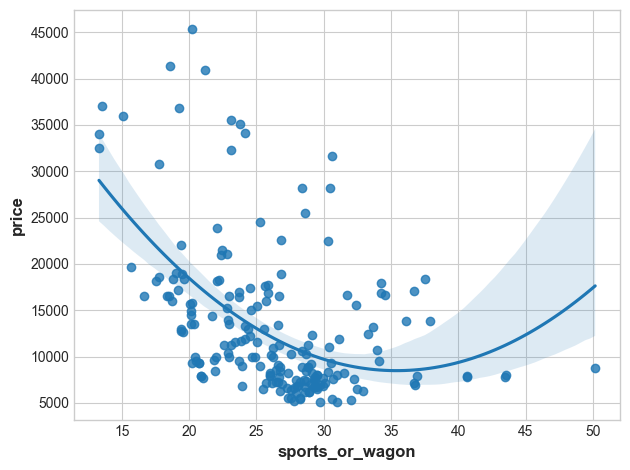

In [9]:
df["sports_or_wagon"] = X.curb_weight / X.horsepower
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);